# Cartesian Gradient Example

---

This example provides a very simple demonstration of how to compute the gradient of a scalar field defined on a Cartesian grid using PyMetric. We'll first install
the PyMetric package and then create a field and take the gradient.

In [2]:
# Install the PyMetric package from the source
# code.
! pip install ..

Processing /Users/ediggins/Dev/pymetric
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pymetric-lib: filename=pymetric_lib-0.0.2a2.dev26-py3-none-any.whl size=259935 sha256=25a8ab74cecc3a17193c28d3aa6675f536eff72b198bd9934afc762a7012129e
  Stored in directory: /private/var/folders/wb/hm_py6x1025cwdg8jjs1rg_w0000gn/T/pip-ephem-wheel-cache-9mekzsk3/wheels/5c/a0/f2/adc1bf06554787ce9ad3de709272799b2f3e991ebe4c4ae46e
Successfully built pymetric-lib

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


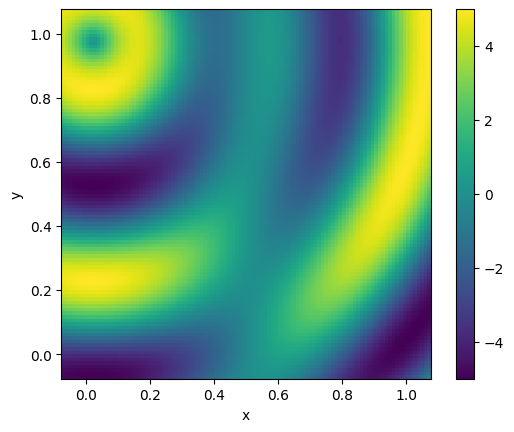

In [29]:
import numpy as np
from pymetric import DenseTensorField, CartesianCoordinateSystem2D, GenericGrid, pg_log
import matplotlib.pyplot as plt

# Disable the logger
pg_log.setLevel("WARNING")

# Create the coordinate system and the grid.
cs = CartesianCoordinateSystem2D()
x, y = (np.linspace(-0.1, 1.1, 104), np.linspace(-0.1, 1.1, 104))
g = GenericGrid(cs, [x, y], ghost_zones=2)

# Define a function of the coords.
func = lambda _x, _y: np.sin(10 * np.sqrt(_x**2 + _y**2)) * 5 * np.cos(3 * _x)

# Create the dense field from the function.
f = DenseTensorField.from_function(func, g, ["x", "y"])

fig, axes = plt.subplots(1, 1)
Q = axes.imshow(f[...].T, extent=g.bbox.ravel())
axes.set_xlabel("x")
axes.set_ylabel("y")
plt.colorbar(Q, ax=axes)
plt.show()

In [33]:
# Generate the gradient vector field for the scalar field.
grad_f = f.gradient()
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
Q1 = axes[0].imshow(grad_f[..., 0].T, extent=g.gbbox.ravel())
axes[0].set_title("Gradient in x direction")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].set_xlim(*g.bbox[0, :])
axes[0].set_ylim(*g.bbox[1, :])
plt.colorbar(Q1, ax=axes[0])
Q2 = axes[1].imshow(grad_f[..., 1].T, extent=g.gbbox.ravel())
axes[1].set_title("Gradient in y direction")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")
axes[1].set_xlim(*g.bbox[0, :])
axes[1].set_ylim(*g.bbox[1, :])
plt.colorbar(Q2, ax=axes[1])
plt.show()